In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, Reshape, Dropout, LayerNormalization
from tensorflow.keras.models import Model, Sequential
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))

import pandas as pd

In [2]:
df = pd.read_csv('AIerror_ONU16_15S_Cycle&Ai&Grantold.csv', usecols=[1], engine='python')
df = df.values
df = df.astype('float32')
#df.head()

In [3]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df)

In [4]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size-4,:], dataset[train_size:len(dataset)-17,:] #-18為了符合shape而更動
print(len(train), len(test))

30861 15186


In [5]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [6]:
# reshape into X=t and Y=t+1
look_back = 5
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)

(30855, 5)
(30855,)
(15180, 5)


In [7]:
# reshape input to be [samples, time steps, features]
#trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
#testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

2 層網絡

In [8]:
# 2 Layers
# create and fit the LSTM network
model = Sequential()
#model.add(LSTM(40, input_shape=(1, look_back)))
batch_size = 165 #look_back = 5, batch_size = 165
#batch_size = int(len(dataset)/90)

#trainX = tf.data.Dataset.from_tensor_slices((trainX, train_label))
#trainX = trainX.repeat().batch(batch_size, drop_remainder=True)

model.add(LSTM(40, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
model.add(LSTM(40, batch_input_shape=(batch_size, look_back, 1), stateful=True))
#model.add(LSTM(40, stateful=True, return_sequences=True))
#model.add(LSTM(40, stateful=True))

model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

for i in range(20):
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size, shuffle=False, verbose=1)
    model.reset_states()
    
#模型評估
trainPredict = model.predict(trainX, batch_size=batch_size)
#reset model
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
#model.compile(loss='mean_squared_error', optimizer='adam')
#model.fit(trainX, trainY, epochs=20, batch_size=32, verbose=1)

187/187 [==============================] - 0s 2ms/step - loss: 0.0010


3 層網絡

In [8]:
# 3 Layers
# create and fit the LSTM network
model = Sequential()
#model.add(LSTM(40, input_shape=(1, look_back)))
batch_size = 165
#batch_size = int(len(dataset)/90)

#trainX = tf.data.Dataset.from_tensor_slices((trainX, train_label))
#trainX = trainX.repeat().batch(batch_size, drop_remainder=True)

model.add(LSTM(40, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
#model.add(LSTM(40, batch_input_shape=(batch_size, look_back, 1), stateful=True))
#model.add(LSTM(40, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(LSTM(40, stateful=True, return_sequences=True))
model.add(LSTM(40, stateful=True))
#model.add(LSTM(40, stateful=True))

model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

for i in range(20):
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size, shuffle=False, verbose=1)
    model.reset_states()
    
#模型評估
trainPredict = model.predict(trainX, batch_size=batch_size)
#reset model
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
#model.compile(loss='mean_squared_error', optimizer='adam')
#model.fit(trainX, trainY, epochs=20, batch_size=32, verbose=1)

187/187 [==============================] - 1s 3ms/step - loss: 0.0010


4 層網絡

In [8]:
# 4 Layers
# create and fit the LSTM network
model = Sequential()
#model.add(LSTM(40, input_shape=(1, look_back)))
batch_size = 165
#batch_size = int(len(dataset)/90)

#trainX = tf.data.Dataset.from_tensor_slices((trainX, train_label))
#trainX = trainX.repeat().batch(batch_size, drop_remainder=True)

model.add(LSTM(40, batch_input_shape=(batch_size, look_back, 1), stateful=True, return_sequences=True))
#model.add(LSTM(40, batch_input_shape=(batch_size, look_back, 1), stateful=True))
#model.add(LSTM(40, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(LSTM(40, stateful=True, return_sequences=True))
model.add(LSTM(40, stateful=True, return_sequences=True))
model.add(LSTM(40, stateful=True))
#model.add(LSTM(40, stateful=True))

model.add(Dense(1))
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mse','mae'])

for i in range(20):
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size, shuffle=False, verbose=1)
    model.reset_states()

#history = model.fit(trainX, trainY, epochs=100, batch_size=batch_size, shuffle=False, verbose=1)
#model.reset_states()
    
#模型評估
trainPredict = model.predict(trainX, batch_size=batch_size)
#reset model
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
#model.compile(loss='mean_squared_error', optimizer='adam')
#model.fit(trainX, trainY, epochs=20, batch_size=32, verbose=1)

187/187 [==============================] - 1s 4ms/step - loss: 0.0131 - mse: 0.0010 - mae: 0.0131


Text(0.5, 1.0, 'mae')

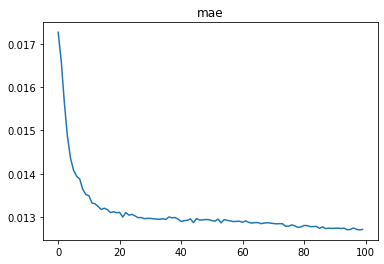

In [9]:
plt.plot(history.history['mae'])
plt.title('mae')

Text(0.5, 1.0, 'mse')

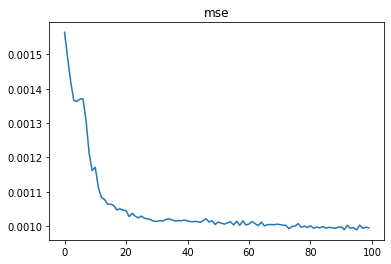

In [10]:
plt.plot(history.history['mse'])
plt.title('mse')

顯示RMSE與RMAE

In [9]:
#2 Layers

from sklearn.metrics import mean_squared_error as mse
# make predictions
#trainPredict = model.predict(trainX)
#testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mse(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mse(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# calculate root mean absolute error
trainScore2 = math.sqrt(mae(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMAE' % (trainScore2))
testScore2 = math.sqrt(mae(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMAE' % (testScore2))

Train Score: 19984.62 RMSE
Test Score: 18866.53 RMSE
Train Score: 96.75 RMAE
Test Score: 95.30 RMAE


In [9]:
#3 Layers

from sklearn.metrics import mean_squared_error as mse
# make predictions
#trainPredict = model.predict(trainX)
#testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mse(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mse(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# calculate root mean absolute error
trainScore2 = math.sqrt(mae(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMAE' % (trainScore2))
testScore2 = math.sqrt(mae(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMAE' % (testScore2))

Train Score: 20008.18 RMSE
Test Score: 19172.17 RMSE
Train Score: 98.83 RMAE
Test Score: 97.50 RMAE


In [9]:
#4 Layers

from sklearn.metrics import mean_squared_error as mse
# make predictions
#trainPredict = model.predict(trainX)
#testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mse(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mse(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# calculate root mean absolute error
trainScore2 = math.sqrt(mae(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMAE' % (trainScore2))
testScore2 = math.sqrt(mae(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMAE' % (testScore2))

Train Score: 20057.97 RMSE
Test Score: 19244.63 RMSE
Train Score: 89.89 RMAE
Test Score: 89.22 RMAE


圖形驗證
畫出訓練與測試的結果與實際值的比較

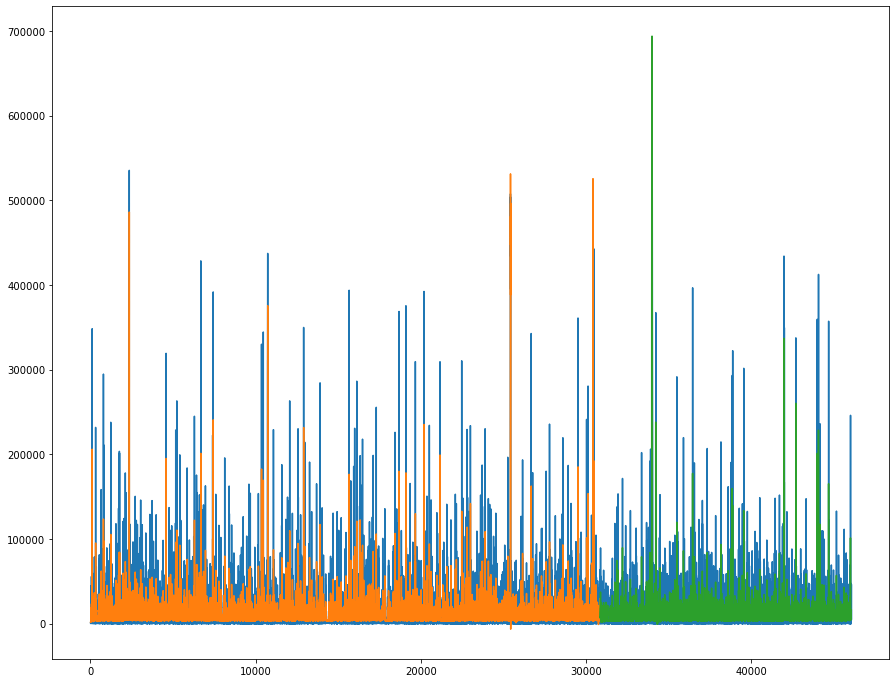

In [10]:
#2 Layers

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
#testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-22, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(15, 12))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

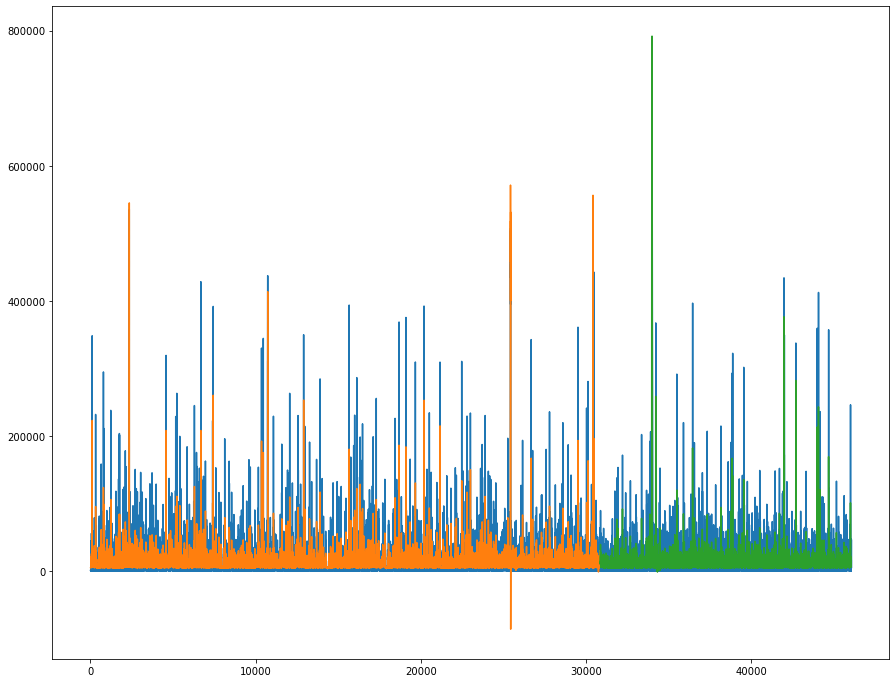

In [10]:
#3 Layers

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
#testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-22, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(15, 12))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

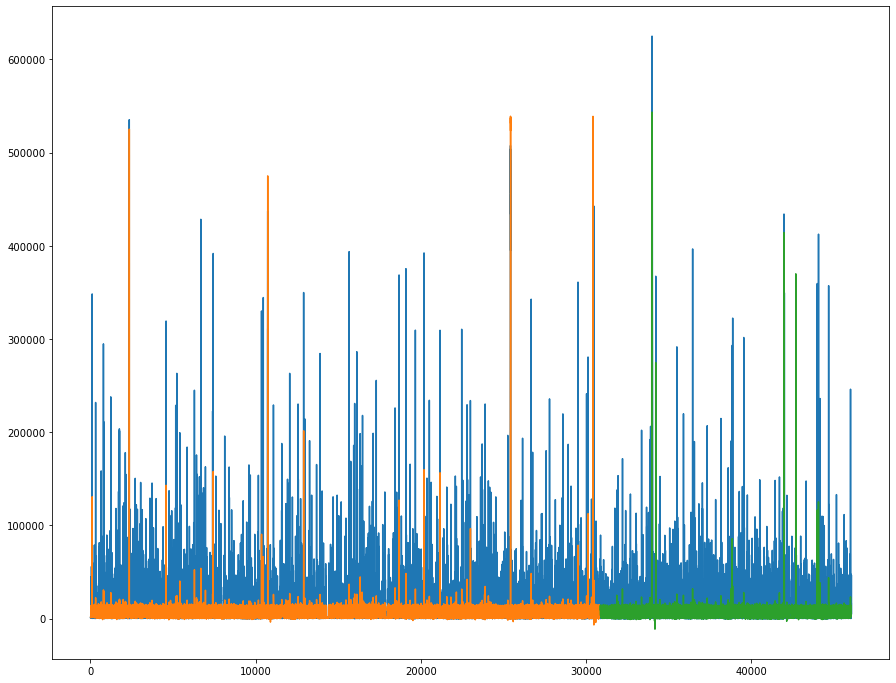

In [10]:
#4 Layers

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
#testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-22, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(15, 12))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (165, 5, 40)              6720      
_________________________________________________________________
lstm_1 (LSTM)                (165, 40)                 12960     
_________________________________________________________________
dense (Dense)                (165, 1)                  41        
Total params: 19,721
Trainable params: 19,721
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (165, 5, 40)              6720      
_________________________________________________________________
lstm_1 (LSTM)                (165, 5, 40)              12960     
_________________________________________________________________
lstm_2 (LSTM)                (165, 40)                 12960     
_________________________________________________________________
dense (Dense)                (165, 1)                  41        
Total params: 32,681
Trainable params: 32,681
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (165, 5, 40)              6720      
_________________________________________________________________
lstm_1 (LSTM)                (165, 5, 40)              12960     
_________________________________________________________________
lstm_2 (LSTM)                (165, 5, 40)              12960     
_________________________________________________________________
lstm_3 (LSTM)                (165, 40)                 12960     
_________________________________________________________________
dense (Dense)                (165, 1)                  41        
Total params: 45,641
Trainable params: 45,641
Non-trainable params: 0
_________________________________________________________________
